In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# from matplodlib import  
with open('gosha.log') as txtf:
    data = txtf.readlines()

with open('gosha_.log') as txtf:
    data2 = txtf.readlines()

ModuleNotFoundError: No module named 'matplotlib'

In [148]:
data = data + data2

In [149]:
df = pd.DataFrame([da.strip('\n').split(';') for da in data])

In [150]:
id_2_username = {}
username_2_id = {}
with open("id_chat_list.txt", 'r') as fd:
    for line in fd:
        k,v = line.split('|')[:2]
        id_2_username[k] = v
        username_2_id[v] = k
# username_2_id

In [151]:
df.columns = df.iloc[0]
df = df[1:]
df['UserId'] = df.Username.map(username_2_id)

In [152]:
df.head()

,DateTime,Username,Movement,Result,Group,Conter,UserId
1,"12/23/2021, 10:33:48",krasty_kovyaz,NLP_request,Success,main,1,93027469
2,"12/23/2021, 14:36:33",krasty_kovyaz,NLP_request,Success,main,2,93027469
3,"12/27/2021, 09:26:27",krasty_kovyaz,NLP_request,Success,main,3,93027469
4,"12/27/2021, 09:44:36",krasty_kovyaz,NLP_request,Success,main,4,93027469
5,"12/27/2021, 09:51:59",krasty_kovyaz,NLP_request,Success,main,5,93027469


In [153]:
fix_map = {'Anutka_5_5': '567169369',
          'Anutka_55': '567169369',
          'docent55': '567169369',
          'Ann_5_5': '567169369',
           'Gosha': '5531769407',
           'pressIsecretary': '626956251',
           'izzyonix': '453256411',
           'Marina_BGT': '811725492',
           'Marina_RiNS2': '811725492',
           'krastykovyaz': '93027469',
           'nagibator2007_VIP':'818909276',
           'fjwjwjuwvusb':'818909276',
           'OlesyaKisl':'5199982563',
           'chris_sl':'1184319141'
          }

In [154]:
df_tmp = (
    df
    .assign(isna=lambda df_: df_.UserId.isna())
    .query("isna==False")
)
full_username_2_id = {**{k:v for k,v in zip(df_tmp.Username, df_tmp.UserId)} , **fix_map}


In [155]:
df = (
    df
    .assign(UserId=lambda df_: df_.Username.map(full_username_2_id))
    .assign(Username=lambda df_: df_.UserId.map(id_2_username))
#     .query("Username.isna()")
)

In [156]:
df = df[df.Username.isna() == False]

In [68]:
df.Movement = df['Movement'].apply(lambda x: str(x)[:12] if 'Rule_config_' in x else x)
df.Movement = df['Movement'].apply(lambda x: str(x)[:14] if 'Rules_running_' in x else x)
# df['Username'] = df['Username'].str.replace('Anutka_55','Vasilevskaja')
# df['Username'] = df['Username'].str.replace(str(None),'KsMiVl')

/Users/19028558/Desktop/NLP2.0/venv/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [146]:
from datetime import datetime
df = df[df.DateTime.apply(lambda x: datetime.strptime(x.split(',')[0], '%m/%d/%Y') > datetime.strptime('2022-12-31', '%Y-%m-%d'))]

In [100]:
from copy import deepcopy
stat_dict = {}
for i in range(len(df)):
    user = list(df.Username)[i]
    if user not in stat_dict:
        df_tmp = df[df['Username'] == user]
        sep = (df_tmp.groupby(['Movement']).count()['Username']).to_dict()
#         print(sep)
        stat_dict[user] = deepcopy(sep)

In [101]:
df_result = pd.DataFrame(stat_dict).T.fillna(0).astype('int').reset_index().rename(columns={'index':'Username'})

In [102]:
df_result.rename(columns={'Rule_config_': 'Rule_config_fail', 'Rules_running_': 'Rules_running_fail'}, inplace=True)
df_result  = df_result.sort_values('NLP_request', ascending=False).reset_index(drop=True)[:13]

In [103]:
df_result.set_index('Username', inplace=True)
df_result = df_result[~df_result.index.isin(['krasty_kovyaz'])]
df_result.head(10)

,Branch_request,ChatGPT_mode,Dalle_mode,Diff_result,Diff_result_fail,NLP_request,NLP_request_ai,Notification,Order_config,Permission denied,...,Rule_config_fail,Rules_running,Rules_running_fail,Running_rules,Running_slots,Sber_mode,Slot_config,Slot_config_fail,Upload_file_fail,draw_request_ai
Username,,,,,,,,,,,,,,,,,,,,,
None,1,20,2,0,0,449,90,0,0,10,...,0,1,0,4,3,111,1,2,0,15
ortem_t,0,5,3,0,0,266,30,0,0,3,...,1,2,4,4,3,71,0,0,3,5
zolotilda,0,5,7,0,0,216,60,0,0,0,...,0,0,0,2,2,36,0,0,0,29
Donchik777,0,2,2,0,0,183,25,0,0,2,...,0,1,0,1,2,34,0,0,0,4
Ilya_Grebenshchikov,0,4,0,0,0,178,17,0,0,1,...,3,0,0,4,1,42,1,0,0,0
Vlarikon,0,0,0,0,0,115,1,0,0,0,...,0,0,0,0,0,42,0,0,0,0
m_potapova,0,2,0,0,0,101,10,0,0,1,...,0,0,0,0,1,21,0,0,0,0
asshabanov,0,0,0,0,0,89,0,0,0,1,...,0,0,0,0,0,25,0,0,0,0
Leahes,16,1,0,0,0,53,22,0,0,1,...,0,0,0,3,1,52,0,0,0,0


In [104]:
for col in df_result.columns:
    print(col)

Branch_request
ChatGPT_mode
Dalle_mode
Diff_result
Diff_result_fail
NLP_request
NLP_request_ai
Notification
Order_config
Permission denied
Pushlogs
Regex_reform
Regex_reform_fail
Regex_suggest
Regex_suggest_fail
Rule_config
Rule_config_fail
Rules_running
Rules_running_fail
Running_rules
Running_slots
Sber_mode
Slot_config
Slot_config_fail
Upload_file_fail
draw_request_ai


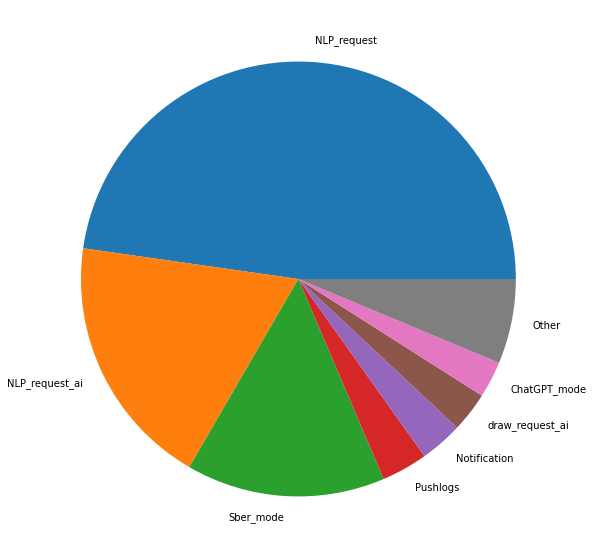

In [105]:
# Распеределение по использованю бота
totals = df['Movement'].value_counts()
totals.rename({'Rule_config_':'Rule_config_fail'}, inplace=True)
small_totals = totals[totals < 8_0]
big_totals = totals[totals > 8_0]
small_sums = pd.Series([small_totals.sum()], index=["Other"])
big_totals = big_totals.append(small_sums)
# plt.title('Pie distribution of the logs')
big_totals.plot(kind="pie", label="", figsize=(20,10))
plt.savefig('./save_pics/pie_logs.png', dpi=500)

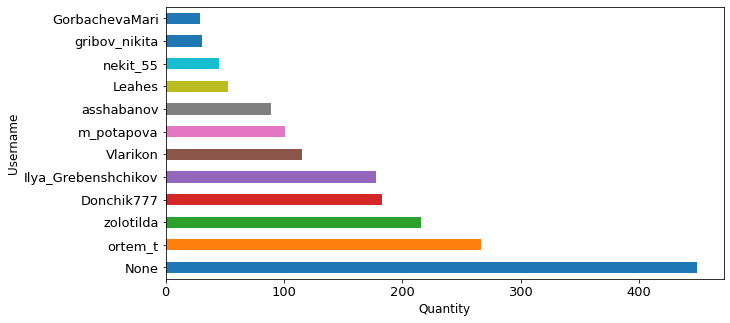

In [106]:
# Распределение запросов
ax=plt.gca()
df_result['NLP_request'].plot(kind="barh", fontsize=13, figsize=(10,5), ax=ax)
ax.set_ylabel('Username', fontsize=12)
ax.set_xlabel('Quantity', fontsize=12)
# plt.set_title('Quantity', fontsize=12)
plt.savefig('./save_pics/request.png', dpi=500)
plt.show()

In [107]:
# totals = df_result.set_index('Username')['NLP_request']
# small_totals = totals[totals < 100_000]
# big_totals = totals[totals > 100_000]
# small_sums = pd.Series([small_totals.sum()])
# big_totals = big_totals.append(small_sums)
# big_totals.plot(kind="pie", label="")

TypeError: Empty 'DataFrame': no numeric data to plot

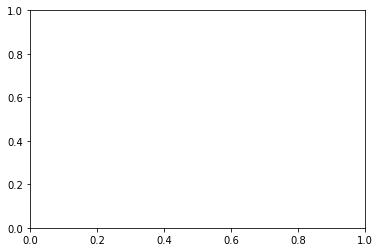

In [108]:
# Количество фейлов
ax = plt.gca()
df_result_cp = df_result[df_result['Slot_config_fail'] > 2].copy()
df_result_cp[['Rules_running_fail', 'Rule_config_fail','Slot_config_fail']].plot(kind="bar", figsize=(13,10), ax=ax)
ax.set_xlabel('Username', fontsize=18)
ax.set_ylabel('Quantity', fontsize=18)
plt.savefig('./save_pics/failed_operations.png', dpi=500)
plt.show()

In [112]:
df_nlp_req = df[df['Movement'] == 'NLP_request']

In [114]:
# Количество обращений
print('Нерабочее время', len([time for time in pd.to_datetime(df_nlp_req["DateTime"]).dt.hour if 9 < time < 18]))
print('Всего запросов', df.Conter.count())
print('Ночное время', len([time for time in pd.to_datetime(df_nlp_req["DateTime"]).dt.hour if 0 < time < 6]))
# team = list(df_result.index) 
# df_not_team = df[~df['Username'].isin(team)]
filt = df['Username'].isin(['krasty_kovyaz','Gosha','Schwarzlemur','Vasilevskaja', 'Marina_IVR', \
                                     'Donchik777', 'asgertsog',\
                               'alexzaycev', 'nekit_55', 'curlyirina','izzionix', \
                           'Anutka_5_5','docent55','Ann_5_5','Gosha','izzyonix','Marina_BGT','Marina_RiNS2',\
                          'krastykovyaz','OlesyaKisl','chris_sl', 'GorbachevaMari','kkkkk_kkk_kkkkk', \
                           'Vlarikon', 'Ilya_Grebenshchikov', 'sveta_konfeta_orlova', \
                           'nikolaypavlychev', 'ortem_t', 'grishmanovskaya', 'Borisenkoff'])
print('Запросов не из нашей команды', df[~filt].shape[0])

Нерабочее время 1549
Всего запросов 4493
Ночное время 10
Запросов не из нашей команды 2194


In [157]:
df_nlp_req = df[df['Movement'] == 'NLP_request']
# df_nlp_req

In [158]:
df_date_ = pd.to_datetime(df_nlp_req["DateTime"]).dt.date #.value_counts().sort_values('index')
counter_date = {}
for date in list(df_date_):
    if str(date) not in counter_date:
        counter_date[str(date)] = 1
    else:
        counter_date[str(date)] += 1
df_date_series = pd.Series(counter_date)

/Users/19028558/Desktop/NLP2.0/venv/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


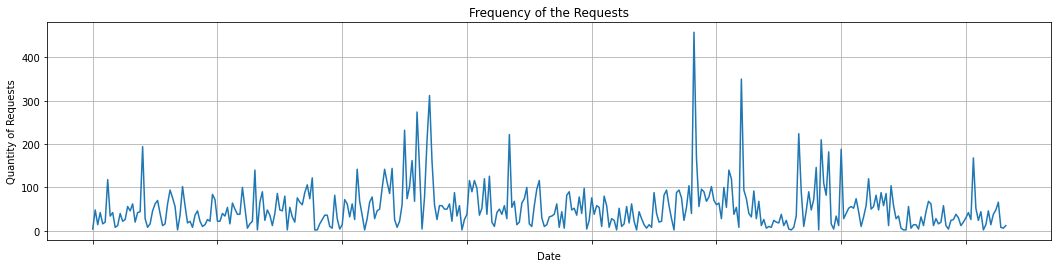

In [159]:
ax = plt.gca()

df_date_series.plot(kind='line', figsize=(18,4),ax=ax)
# ax.title = 'Distribution of Requests'
ax.set_xlabel('Date')
ax.set_ylabel('Quantity of Requests')
ax.set_title('Frequency of the Requests')
ax.grid(True)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 10))
plt.savefig('./save_pics/Request_friquency.png', dpi=1000)
plt.show()


### Days

In [120]:
df['weekday'] = pd.to_datetime(df.DateTime).dt.dayofweek
df['hour'] = pd.to_datetime(df.DateTime).dt.hour
df_date = df.copy()
df_date.DateTime = pd.to_datetime(df.DateTime).dt.date

/Users/19028558/Desktop/NLP2.0/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/19028558/Desktop/NLP2.0/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [121]:
weekday_dict = {
    0:'Mon.',
    1:'Tue.',
    2:'Wed.',
    3:'Thu.',
    4:'Fri.',
    5:'Sat.',
    6:'Sun.'
}

df_date['weekdays'] = df_date.weekday.apply(lambda x: weekday_dict[x])

In [122]:
filt = df['Movement'] == 'Notification'
df = df[~filt]

In [123]:
weekday_dist = df_date.groupby('weekday')['Movement'].count()
day_dist = df.groupby('hour')['Movement'].count()
weekday_dist = weekday_dist.reset_index()
weekday_dist['weekday'] = weekday_dist['weekday'].apply(lambda x: weekday_dict[x])
weekday_dist.set_index('weekday', inplace=True)

In [124]:
# Time

# ax=plt.gca()
# df.groupby('hour')['Movement'].count()

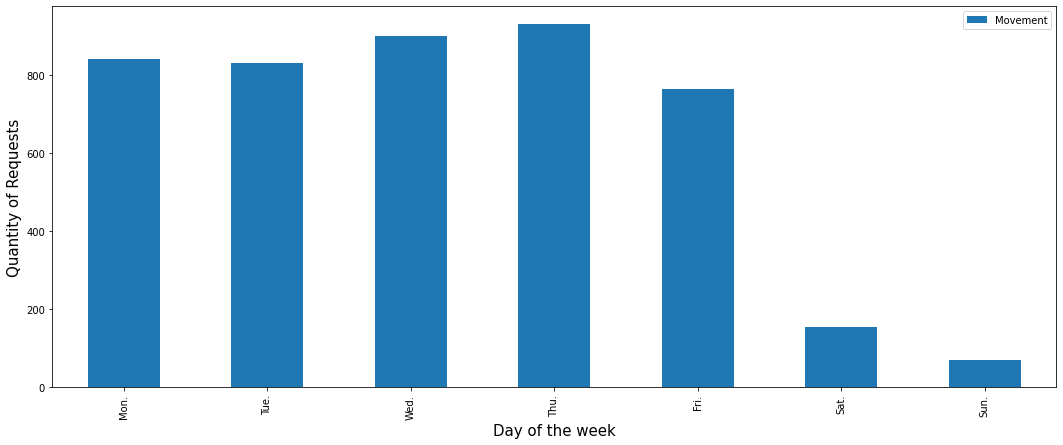

In [125]:
ax = plt.gca()
weekday_dist.plot(kind='bar', ax=ax, figsize=(18,7))
ax.set_ylabel('Quantity of Requests', fontsize=15)
ax.set_xlabel('Day of the week', fontsize=15)
# ax.set_title('Weekday distribution')
plt.savefig('./save_pics/Weekday_distribution.png', dpi=500)
plt.show()

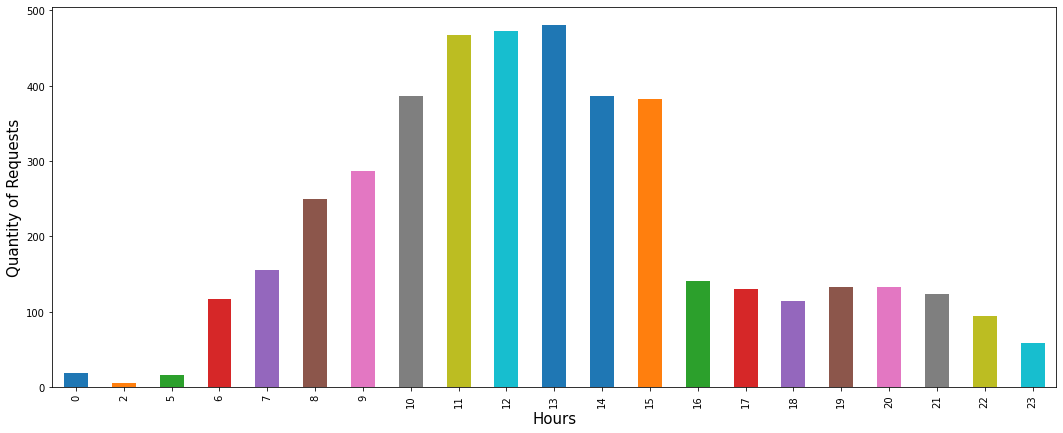

In [126]:
ax = plt.gca()
day_dist.plot(kind='bar', ax=ax, figsize=(18,7))
ax.set_ylabel('Quantity of Requests', fontsize=15)
ax.set_xlabel('Hours', fontsize=15)
plt.savefig('./save_pics/Hours_distribution.png', dpi=500)
plt.show()

In [2]:
!pip install bar_chart_race --quiet
!pip install ffmpeg-python --quiet
import bar_chart_race as bcr

In [17]:
df.DateTime = pd.to_datetime(df.DateTime)
df.head()

NameError: name 'df' is not defined

In [18]:
df['Growth'] = 1
df['Growth'] = df.groupby('Username')['Growth'].cumsum()

NameError: name 'df' is not defined

In [162]:
df.reset_index(drop=True)

,DateTime,Username,Movement,Result,Group,Conter,UserId,Growth
0,2021-12-23 10:33:48,krasty_kovyaz,NLP_request,Success,main,1,93027469,1
1,2021-12-23 14:36:33,krasty_kovyaz,NLP_request,Success,main,2,93027469,2
2,2021-12-27 09:26:27,krasty_kovyaz,NLP_request,Success,main,3,93027469,3
3,2021-12-27 09:44:36,krasty_kovyaz,NLP_request,Success,main,4,93027469,4
4,2021-12-27 09:51:59,krasty_kovyaz,NLP_request,Success,main,5,93027469,5
5,2021-12-27 09:52:03,krasty_kovyaz,NLP_request,Success,main,6,93027469,6
6,2021-12-27 09:53:38,krasty_kovyaz,NLP_request,Success,main,7,93027469,7
7,2021-12-27 10:02:18,krasty_kovyaz,NLP_request,Success,main,8,93027469,8
8,2021-12-27 10:02:18,krasty_kovyaz,NLP_request,Success,main,9,93027469,9
9,2021-12-27 10:07:04,krasty_kovyaz,Running_slots,Success,main,1,93027469,10


In [15]:
from copy import deepcopy
# from tqdm import tqdm
name_list = list(df['Username'])
datetime_list = []
name_dict = {name: 0 for name in name_list}
for row in range(1, df.shape[0]):
    name = df.iloc[row].Username
        
    name_dict[name] += 1
#     date = f'date_{row}'
    name_dict['date'] = df.iloc[row].DateTime
#     print(df['DateTime'][row])
    datetime_list.append(deepcopy(name_dict))
#     if row < 2:
#         print(datetime_dict.keys())

NameError: name 'df' is not defined

In [16]:
df_2_chart = pd.DataFrame(datetime_list)
df_2_chart['date'] = pd.to_datetime(df_2_chart['date']).dt.date
df_2_chart.set_index('date', inplace=True)
df_2_chart.to_excel('dataset_4chart.xlsx')

NameError: name 'datetime_list' is not defined

In [19]:
df_2_chart = pd.read_excel('dataset_4chart.xlsx', engine='openpyxl')
df_2_chart['date'] = df_2_chart['date'].astype('str')
# df_2_chart.groupby('date').sum()
# df_2_chart.set_index('date',inplace=True)


In [20]:
df_2_chart = df_2_chart.drop(['krasty_kovyaz'], axis=1)

In [21]:
# df_2_chart['Cumsum'] = 1
# df_2_chart['Cumsum'] = df_2_chart.groupby('date')['Cumsum'].cumsum()
df_2_chart = df_2_chart.drop_duplicates('date', keep='last').set_index('date')[::-1]

In [22]:
# bcr.bar_chart_race(df = df_2_chart, title = "Number of requests from users")
bcr.bar_chart_race(
    df=df_2_chart,
    filename='Number_of_requests_from_users.mp4',
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=700,
    cmap='dark12',
    title='Number of requests from users ',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  

/Users/aleksandr/Desktop/atomhack/venv/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/Users/aleksandr/Desktop/atomhack/venv/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/Users/aleksandr/Desktop/atomhack/venv/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/Users/aleksandr/Desktop/atomhack/venv/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/Users/aleksandr/Desktop/atomhack/venv/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:284: 